# Генерация данных для примеров

In [1]:
# Данные для демонстрации примеров отбора признаков
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

pd.options.display.float_format = "{:,.2f}".format      # функция форматирования для каждого выводимого числа

np.random.seed(123)
X,y = make_classification(n_samples= 10_000, n_features=10, n_redundant=4, random_state=24675)
X = pd.DataFrame(columns=[f"x{i}" for i in range(X.shape[1])], data=X)
# столбец с маленьким диапазоном значений, равномерное распределение
X['x10'] = np.random.uniform(low=-0.1, high=0.1, size=len(X),)
X['x11'] = 42
X.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,1.46,-0.35,0.05,-0.79,0.80,0.45,0.87,0.87,0.72,0.89,0.04,42
1,-0.69,-0.68,0.16,0.25,0.08,0.78,1.06,0.58,-0.14,1.21,-0.04,42
2,-0.24,2.00,-0.75,-0.46,-0.47,-1.99,-0.96,2.07,0.05,-1.86,-0.05,42
3,0.18,-0.69,0.28,-0.24,0.30,0.66,0.16,-1.00,-1.59,0.51,0.01,42
4,-0.11,-1.23,0.39,0.58,0.78,1.30,1.14,-0.30,1.02,1.58,0.04,42


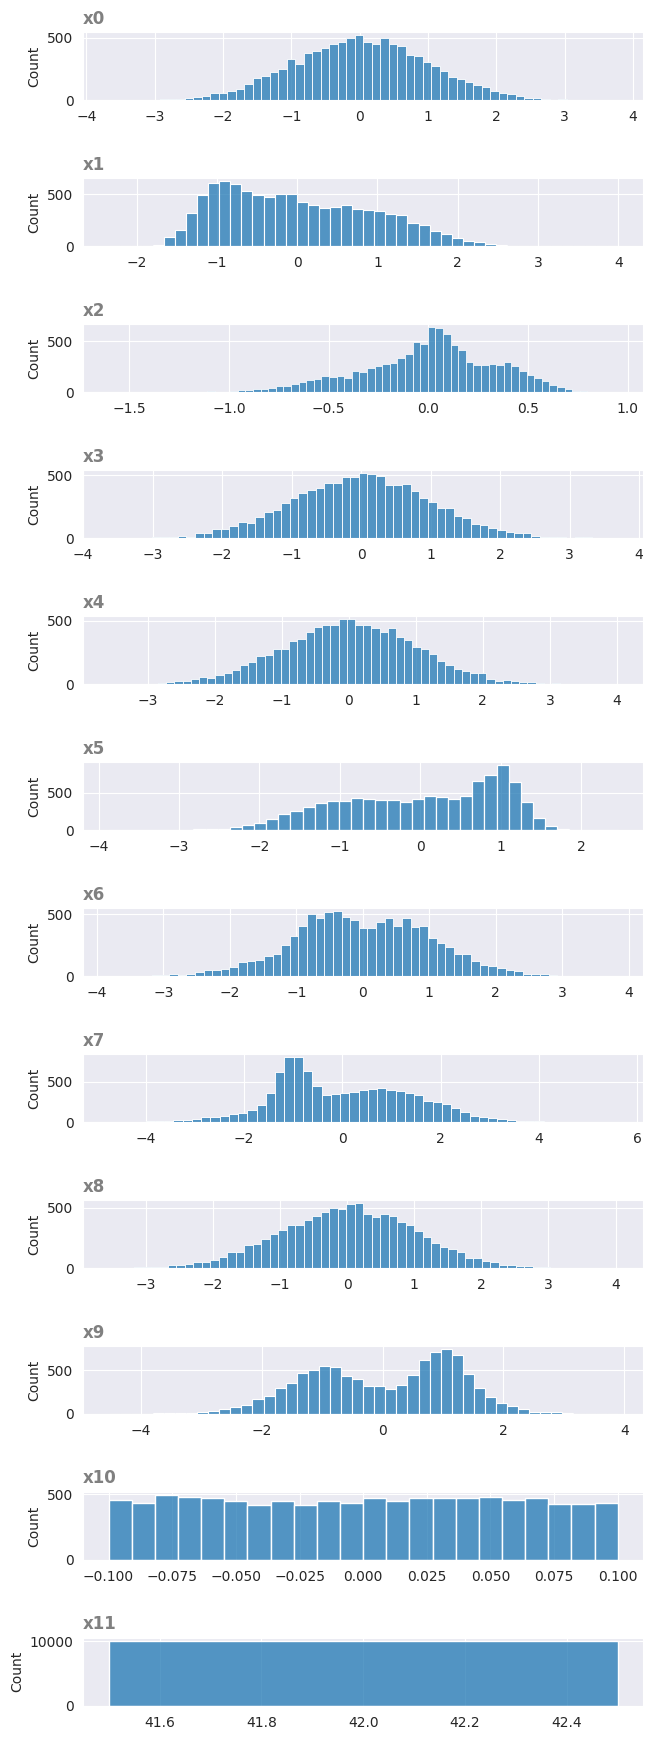

In [2]:
import seaborn
import matplotlib.pyplot as plt

seaborn.set_style("darkgrid")

RowsCols = len(X.columns), 1        # кортеж, описывающий количество мест для графиков (по строкам, по столбцам)
fig,_ = plt.subplots( *RowsCols, figsize=(7, 1.5*len(X.columns)) )        # полотно для набора графиков
fig.tight_layout(pad=3.5)                                               # отступы (padding) между графиками; иначе подзаголовки не влезут
for i, col in enumerate( X.columns ):
    plt.subplot( *RowsCols, i+1).set_title(col, fontweight='bold', color='gray', loc='left')
    plt.xlabel(' ')
    seaborn.histplot( X[col] )

In [3]:
X.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,0.02,0.00,-0.00,-0.00,0.01,-0.00,-0.01,-0.01,0.01,-0.01,-0.00,42.00
std,1.00,0.94,0.33,1.00,0.99,0.98,1.01,1.36,0.99,1.22,0.06,0.00
min,-3.68,-2.35,-1.60,-3.63,-3.58,-3.88,-3.82,-4.76,-3.55,-4.53,-0.10,42.00
25%,-0.66,-0.80,-0.20,-0.68,-0.65,-0.79,-0.71,-1.03,-0.67,-1.00,-0.05,42.00
50%,0.02,-0.12,0.03,0.01,0.01,0.13,-0.05,-0.18,0.03,0.10,0.00,42.00
75%,0.69,0.72,0.22,0.67,0.69,0.87,0.71,1.02,0.69,1.01,0.05,42.00
max,3.78,3.99,0.95,3.69,4.01,2.45,3.83,5.61,4.03,3.89,0.10,42.00


In [4]:
# перед отбором по STD данные нужно масштабировать
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x2 = scaler.fit_transform(X)
X2 = pd.DataFrame( data = x2, columns=X.columns)
X2.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
min,-3.70,-2.50,-4.81,-3.64,-3.62,-3.94,-3.79,-3.50,-3.58,-3.70,-1.73,0.00
25%,-0.69,-0.85,-0.59,-0.68,-0.67,-0.80,-0.70,-0.75,-0.68,-0.81,-0.88,0.00
50%,-0.01,-0.13,0.08,0.01,-0.00,0.14,-0.04,-0.13,0.02,0.09,0.02,0.00
75%,0.67,0.76,0.65,0.67,0.68,0.89,0.71,0.76,0.69,0.83,0.85,0.00
max,3.76,4.24,2.86,3.69,4.03,2.51,3.81,4.14,4.05,3.19,1.74,0.00


In [24]:
# todo: разделить на трейн и тест

# Отбор признаков (feature selection)

**Зачем?**
- Убирает проблему мультиколлинаераности (актуальна для некоторых моделей) 
- Упрощает модель
    - следовательно упрощает задачу обучения модели. Больше шансов построить более точную модель.
    - модель можно обучить быстрее
    - простые модели менее склонны к переобучению.
- Упрощение визуализации. На диаграммах можно показывать только самые важные признаки, это особенно актуально для визуализации многомерных данных на двумерных или трёхмерные диаграммах (например диаграммах рассеяния - scatterplots)

**проклятье размерности (curse of dimensionality)** - проблемы возникающие при большом количестве признаков:
- возможны случайные зависимости между признаками (в том числе между целевым и независимыми)
- повышенное потребление памяти 

Например, большое количество признаков возникает при унитарном кодировании (one-hot) или при кодировании текста с помощью TF-IDF, когда количество признаков определяется размером словаря (обычно тысячи или десятки тысяч слов).

После уменьшения пространства признаков данных можно хранить более компактно.



**Ссылки**
1. https://scikit-learn.org/stable/modules/feature_selection.html


## Критерии отбора
#### 1. На основе изменчивости признаков
Удалять все константные признаки или признаки с маленьким стандартным отклонением.

In [5]:
from sklearn.feature_selection import VarianceThreshold

print(f"shape before filtering: {X2.values.shape}")
var_filter = VarianceThreshold(threshold=0.1)

x3 = var_filter.fit_transform(X2)
print( var_filter.feature_names_in_ )               # исходные признаки
print( var_filter.get_feature_names_out() )         # отфильтрованные признаки
print(f"shape before filtering: {x3.shape}")

shape before filtering: (10000, 12)
['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11']
['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10']
shape before filtering: (10000, 11)


#### 2. Фильтрационные методы - отбрасывать признаки по одному, независимо друг от друга
- По коэффициенту корреляции Пирсона (линейному к.к.).
    - Выбирать признаки, которые имеют сильную корреляцию с целевым признаком. Например $|r| > 0.2$
    - Отбросить те признаки, для которых есть парный признак с высокой корреляцией.\
    Это поможет избавиться от почти линейной зависимости между признаками, которая вредит некоторым моделям (линейная и логистическая регрессия).
- Другие показатели взаимосвязи признаков (например нелинейные К.К., критерий Хи-квадрат ). См. также пакет `phik`



In [6]:
# todo: матрица корреляции
# todo: другие критерии
from sklearn.feature_selection import SelectKBest       # выбирает k наиболее значимых признаков на основе заданной функции вычисления значимости
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
from sklearn.feature_selection import SelectPercentile
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile

#### 3. На основе показателей (или параметров) некоторых моделей (Model-based method)
- Коэффициенты перед признаками в линейной или логистической регрессии.\
    Чем больше коэффициент тем более значим признак. *Признаки должны быть приведены к одной и той же шкале*
- Значимость признаков на основе случайного леса или градиентного бустинга.

Во время обучения дерева ([пример](https://colab.research.google.com/drive/1Bin_h7BPSfnxs4Pea7eibceNMkOEcKmg?usp=sharing)) нужно решать два вопроса: какой признак использовать для разделения узла на ветви, какую границу значения признака выбрать. 
Выбирается тот признак, который даёт больше прироста информации (позволяет создать более эффективное разделение). Для оценки этого показателя используются или коэффициент Джини или показатель информационной энтропии.
Чем чаще признак использовался для разделения, тем важнее признак. Обычно это количество делиться на общее количество деревьев (или узлов во всех деревьях).

##### Модели, предоставляющие показатели важности признаков
- **Линейная регрессия** - на основе коэффициентов ($b_1, b_2, ...$) перед признаками в уравнении линейной регрессии: $y = b_0 + b_1 \cdot x_1 + b_2 \cdot x_2 + ...$ 
- **Случайный лес** - это беггинг на решающих деревьях, т.е. обучение на разных подвыборках. Кроме того, для каждого дерева используется случайное подмножество признаков. Поэтому показатели важности признаков могут отличаться от раза к разу. 
- **Градиентный бустинг** - похож на лес, т.к. в качестве базовых моделей часто используются деревья решений.

В SKlearn есть специальный класс, который способен автоматически отбирать признаки, вне зависимости от того, какая модель предоставляет показатели важности признаков - `SelectFromModel`.


Такое измерение важности признаков, в отличии, например от К.К., позволяет оценить важность отдельного признака, но при этом все признаки учитываются в совокупности.

In [26]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectFromModel
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html


# модели, которые в ходе построения (обучения) получают показатели важности признаков:
forest = RandomForestClassifier(n_estimators=1000, random_state=143, n_jobs=-1)
forest.fit(X, y)

gradboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=143)
gradboost.fit(X, y)

logreg = LogisticRegression(random_state=143)       # проверить масштабирование признаков перед обучением!
logreg.fit(X, y)
# использовать линейную регрессию, если решается задача регрессии


# таблица важности признаков. Важность имеет разные природу, поэтому непосредственно сравнивать значения не корректно
# но можно сравнивать ранги
FeatureImportance = pd.DataFrame( data = [list(forest.feature_importances_) + ['forest'],
                                          list(np.abs(logreg.coef_[0]) / 2) +     ["logreg"],
                                          list(gradboost.feature_importances_)  +["gradboost"]], 
                                          
                                          columns = list(X.columns) + ['model']) 
# для коэффициентов линейной регрессии используется модуль, т.к. признак может оказывать и обратное, но сильное влияние 
# деление на два только для последующего удобства визуализации
FeatureImportance

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,model
0,0.01,0.13,0.09,0.02,0.02,0.21,0.17,0.05,0.02,0.27,0.02,0.00,forest
1,0.01,0.42,0.11,0.03,0.01,0.46,0.53,0.16,0.01,0.65,0.11,0.00,logreg
2,0.00,0.02,0.02,0.00,0.00,0.01,0.01,0.04,0.00,0.90,0.00,0.00,gradboost


In [27]:
# отбирает все признаки, у которых вес (weight или показатель важности), полученный из модели МО, превышает установленное пороговое значение
feature_selector_forest =    SelectFromModel( forest, threshold="1.5*median",    prefit=True)
X_filtred1 = feature_selector_forest.fit_transform(X, feature_names = X.columns)
feature_selector_gradboost = SelectFromModel( gradboost, threshold="median", prefit=True)
X_filtred2 = feature_selector_gradboost.fit_transform(X, feature_names = X.columns)
feature_selector_logred =    SelectFromModel( logreg, threshold="median").fit(X,y)
# threshold = {median, mean, number} - порог отбора признаков
# max_features (default = None) - задаёт максимальное количество признаков, нужно задать threshold=-np.inf если использовать этот параметр
# prefit - используется уже обученная модель?
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

# # фильтрация колонок на основе важности, полученной из случайного леса
X_filtred = feature_selector_forest.fit_transform(X, feature_names = X.columns)
print("Важные признаки: forest    ",  feature_selector_forest.get_feature_names_out())
print("Важные признаки: gradboost ",  feature_selector_gradboost.get_feature_names_out())
print("Важные признаки: logreg    ",  feature_selector_logred.get_feature_names_out())

Важные признаки: forest     ['x1' 'x2' 'x5' 'x6' 'x7' 'x9']
Важные признаки: gradboost  ['x1' 'x2' 'x5' 'x6' 'x7' 'x9']
Важные признаки: logreg     ['x1' 'x2' 'x5' 'x6' 'x7' 'x9']


In [31]:
# melt - переворачивает таблицу, чтобы названия колонок стали категориями (в новой колонке variable, значения в value)
# id_vars - колонки, которые и так являются категориями и которые нужно сохранить как категории
FeatureImportance.melt(id_vars = ['model'])

# plt.figure( figsize=(12, 4))
# _ = seaborn.barplot(data = FeatureImportance.melt(id_vars = ['model']), x = 'variable', y = 'value', hue ='model') 
# _.set_yscale("log")     # логарифмическая шкала для наглядности
# # столбчатая диаграмма важности признаков
# plt.figure(  figsize=(5,3) )
# seaborn.barplot(data = FeatureImportance, x=FeatureImportance.columns)

px.bar(FeatureImportance.melt(id_vars = ['model']), x = 'variable', y = 'value', 
       color ='model',          # кодировать цветом доп. категорию категорию
       barmode="group",         # показывать столбцы с разными доп. категориями  рядом
       text_auto='.2f',         # подписывать основные значения (высоты столбцов) с такими форматом 
       width=1000).show()

print("Значения важности для разных моделей сравнивать непосредственно нельзя, только ранжировать! ")

Значения важности для разных моделей сравнивать непосредственно нельзя, только ранжировать! 


#### 4. Встроенные методы (Embedded methods) - отбор признаков - часть процесса обучения модели
См. регуляризации (L1 или L2) в линейных моделях.

#### 5. Wrapper methods - ручной или автоматизированный отбор признаков на основе оценки модели на тестовой выборке.

Признаки, для которых показатель важности измерен отдельно (например по КК) всё же на практике могут дать прирост в качестве предсказания модели.  Т.к. в моделях используется совокупность признаков и несколько малозначимых признаков дадут заметный прирост, если использовать их совместно (синергетический эффект).


Поэтому имеет смысл отбирать признаки на основе проверок в модели.

1. Обучить модель. Оценить на тестовой выборке. Удалить признак. Повторить обучение и оценку. Удалить признак окончательно если качество выросло. Повторить для всех признаков или комбинаций признаков.
2. Аналогичный алгоритм, но начинать с одного признака и добавлять признаки.


3. Исчерпывающий выбор признаков - полный перебор всех комбинаций признаков.
```python
from mlxtend.feature_selection import ExhaustiveFeatureSelector
```
- см. Recursive feature elimination

In [35]:
from sklearn.feature_selection import SequentialFeatureSelector
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html
# This Sequential Feature Selector adds (forward selection) or removes (backward selection) features to form a feature subset 
# in a greedy fashion. At each stage, this estimator chooses the best feature to add or remove based on the cross-validation score
# of an estimator. In the case of unsupervised learning, this Sequential Feature Selector looks only at the features (X),
# not the desired outputs (y).

bfs = SequentialFeatureSelector(forest, n_features_to_select=5, direction="forward",
                                cv=None,    # по умолчанию None - CV c 5 частями
                                  n_jobs=-1)
bfs.fit(X,y)

SequentialFeatureSelector(estimator=RandomForestClassifier(n_estimators=1000,
                                                           n_jobs=-1,
                                                           random_state=143),
                          n_features_to_select=5, n_jobs=-1)

In [36]:
# какие признаки оставить (true)?
bfs.get_support()

array([ True,  True, False, False, False, False, False,  True,  True,
        True, False, False])

In [37]:
X.columns[ bfs.get_support() ]

Index(['x0', 'x1', 'x7', 'x8', 'x9'], dtype='object')

##### Рекурсивное удаление признаков



Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

Это вариант обратного (backward) удаления признаков (см. SequentialFeatureSelector), но последний проверяет комбинацию признаков полагаясь на метод проб и ошибок. Для каждой комбинации признаков, с использованием  CV вычисляется показатель качества предсказания. Поэтому такой отбор работает в разы более медленно.

RFE полагается не на качество предсказания, а на показатели важности признаков. 

In [ ]:
from sklearn.feature_selection import RFE       #  recursive feature elimination
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

from sklearn.ensemble import RandomForestClassifier

# модели, которые в ходе построения (обучения) получают показатели важности признаков:
forest = RandomForestClassifier(n_estimators=1000, random_state=143, n_jobs=-1)
# forest.fit(X, y)

rec_selector = RFE(estimator = forest, 
                   n_features_to_select=5,  # сколько признаков оставить 
                   step=1                   # number of features to remove at each iteration.
                   )
# может выполняться долго

rec_selector = rec_selector.fit(X, y)

array([False,  True,  True, False, False,  True,  True, False, False,
        True, False, False])

In [32]:
pd.set_option('display.width', 100); np.set_printoptions(linewidth=100)
print( X.columns )                  # названия признаков
print(rec_selector.support_)        # маска для оставшихся (важных) признаков
print( X.columns[rec_selector.support_])    # выбор признаков по маске

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11'], dtype='object')
[False  True  True False False  True  True False False  True False False]
Index(['x1', 'x2', 'x5', 'x6', 'x9'], dtype='object')


In [ ]:
# ранжированные по важности признаки, наиболее важные признаки имеют меньший ранг
rec_selector.ranking_

array([7, 1, 1, 5, 6, 1, 1, 2, 3, 1, 4, 8])

#### 5. Уменьшение размерности
PCA, UMAP и др. методы

Основной пример: https://colab.research.google.com/drive/1OjrSLj2hWx-0AqZtTc4ydOH5d22DFDxf

In [55]:
from sklearn.decomposition import PCA
# создаем объект PCA
pca = PCA(n_components=2)
# обучаем модель и преобразуем данные
X_transformed = pca.fit_transform(X)


todo: Линейный дискриминантный анализ

Объединение признаков (FeatureAgglomeration) - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.FeatureAgglomeration.html#sklearn.cluster.FeatureAgglomeration

## См. также
Здесь рассмотрены не все приёмы уменьшения количества признаков.

Подробности и другие приёмы см. в
- Примерах, документации и статьях ScikitLearn: https://scikit-learn.org/stable/modules/feature_selection.html
- habr: Обзор методов отбора признаков, 2019: https://habr.com/ru/companies/jetinfosystems/articles/470622/
-Основы машинного обучения, лекция 16 — отбор признаков (ФКН, ВШЭ,  2022): https://www.youtube.com/watch?v=rxiORUw-nKs

См. также возможности пакета `mxtend` https://rasbt.github.io/mlxtend/#examples


# Извлечение признаков (feature extraction)

**Текст**: 
- номера слов в словаре
- Bag Of Words (BoW)
- TF-IDF
- Векторные представления слов (эмбеддинги слов)
- Векторные представления текста, модели на основе архитектуры Transformer
    - https://colab.research.google.com/drive/1Aacg8tUXXNICQ0SetvqoIPD7GXnm0Ymx

**Изображения и текст**
- **CLIP** - модель, выдающая векторные представления текста и изображений
    - https://colab.research.google.com/drive/1IBdKzbY3sQBb7C2o03rZlLH_oYBVOpb1


**Временные ряды**\
Если нужно представить временной ряд как характеристику объекта то можно измерить отдельные параметры временного ряда и использовать их. 
Например товар, помимо прочих характеристик, описывается графиком изменения цены. Для разных товаров этот график может содержать разное количество точек за разные временные интервалы. Если стоит задача представить товар как фиксированный набор признаков, то можно из временного ряда вычислить:
- среднее значение, стандартное отклонение и др. статистические показатели
- показатель тренда, сезонности (одной или нескольких)
- ...

**Табличные данные**
- Замена некоторых признаков на номер кластера
- Замена признаков на выводы произвольной модели, например на ответы базовых моделей ансамбля типа стекинг.

# Преобразование \ создание признаков


### Кодирование
- Числовое кодирование категориальных признаков (label encoding)\
  Можно применять когда категории можно ранжировать, или когда категорий всего две.\
  ```python
  from sklearn.preprocessing import LabelEncoder
  ```
- Унитарный код (one-hot) для категориальных признаков\
  `pandas get dummies`
  ```python 
  from sklearn.preprocessing import LabelBinarizer
  ```

### Дискретизация

### Логарифмирование
Полезно, когда у признака большой диапазон значений, но большие и очень большие значения на практике мало о чем говорят. Например цены квартир в 50 и 150 миллионов, при основной массе цен в районе 10-30 млн. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Binary_logarithm_plot_with_ticks.svg/1024px-Binary_logarithm_plot_with_ticks.svg.png" width=300 alt="график логарифма">


**Закон Вебера — Фехнера** — эмпирический психофизиологический закон, заключающийся в том, что интенсивность ощущения чего-либо линейно зависит от логарифма интенсивности раздражителя

В моделях тоже иногда имеет смысл внедрять такую зависимость путём преобразования некоторых признаков. 

todo: приведение к распределению, близкому к нормальному

Feature extraction - https://scikit-learn.org/stable/modules/feature_extraction.html

#### Создание новых признаков
**Создание новых признаков на основе комбинации старых**


Например: 
- индекс массы тела, как нелинейная комбинация ($m/h^2$) роста ($h$) и массы ($m$)
- цена квадратного метра прощали квартиры как частное стоимости квартиры и прощади квартиры
- максимальное изменение температур, если известен минимум и максимумум
- ..

**Автоматическое создание**
Полиномиальные признаки. Исходные признаки комбинируются в слагаемые полнома заданной степени.

Например, признаки $x_1, x_2, x_3$ при использовании полинома степени 2:
$x_1^2,\text{ } x_2^2,\text{ }, x_3^2, \text{ } x_1 x_2,\text{ } x_1 x_3,\text{ }  x_2 x_3$

In [29]:
from sklearn.preprocessing import PolynomialFeatures
# https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features

pf2 = PolynomialFeatures( degree=2,                 # степень полинома
                          interaction_only=False,   # только перемножать признаки, исключить степени? 
                          include_bias=False,
                         )

Xp = pf2.fit_transform(X)
Xp

array([[ 1.46222373e+00, -3.53897630e-01,  4.50902204e-02, ...,  1.54400564e-03,  1.65034116e+00,  1.76400000e+03],
       [-6.90806283e-01, -6.77624536e-01,  1.63397639e-01, ...,  1.82945536e-03, -1.79642959e+00,  1.76400000e+03],
       [-2.43481331e-01,  1.99531433e+00, -7.49142327e-01, ...,  2.98440514e-03, -2.29444779e+00,  1.76400000e+03],
       ...,
       [-8.76903082e-01, -3.79461236e-01,  1.06583143e-01, ...,  9.41462464e-03,  4.07521752e+00,  1.76400000e+03],
       [-1.57816244e-01, -1.05728930e+00,  2.04290868e-01, ...,  3.12118601e-03, -2.34643818e+00,  1.76400000e+03],
       [-2.63876156e-01, -5.75723829e-01,  1.74651742e-01, ...,  5.13449911e-04,  9.51696193e-01,  1.76400000e+03]])

In [35]:
# названия новых признаков
pf2.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x0^2', 'x0 x1',
       'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11',
       'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10',
       'x1 x11', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10',
       'x2 x11', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11',
       'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x5^2', 'x5 x6',
       'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10',
       'x6 x11', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11',
       'x9^2', 'x9 x10', 'x9 x11', 'x10^2', 'x10 x11', 'x11^2'], dtype=object)

In [ ]:
# для примера оценим важность признаков на основе дерева
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

forest = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=143, n_jobs=-1)
forest.fit(Xp, y)

# forest.feature_importances_

from sklearn.feature_selection import RFE       #  recursive feature elimination
rec_selector = RFE(estimator = forest, 
                   n_features_to_select=5,  # сколько признаков оставить 
                   step=1,                  # number of features to remove at each iteration.
                   verbose=1                # выводить информацию о прогрессе
                   )

rec_selector = rec_selector.fit(Xp, y)

In [39]:
print( pf2.get_feature_names_out()[rec_selector.support_])    # выбор признаков по маске

['x5' 'x9' 'x5 x11' 'x6 x11' 'x9 x11']


# Работа с пропусками

Заполнение пропусков 
- Без заполнения: Удаление строк \ столбцов
- Заполнение константами:
   - Среднее значение, медиана и т.д.
   - Мода для категориального признака
- Заполнение с помощью алгоритма:
   - Категориальный признак можно заменять на на моду, а на одно из возможных значений, в соответствии с их распределением;\
     Например если 30% клиентов владеют картой типа A, 45% картой типа B, а 25% картой С, то для каждого объекта с пропуском можно выбрать случайным значение A, B или C с вероятностями 30%, 45% и 25%
   - Решить задачу предсказания пропущенного признака. Например предсказывать значение признака с помощью дерева решений на основе известных данных.  
- Специальные значения, обозначающие пропуск\
  Имеет смысл, если наличие пропуска само по себе может что-то значить для целевого признака